In [163]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [164]:
df = pd.read_csv("Titanic-Dataset.csv")

In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
df.shape

(891, 12)

In [167]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


    PassengerId - Indicates the passenger number
    Survived - Indicates if the passenger travelled is survived or not.
    Pclass - Indicates which class passenger belows
    Name - Provides Names details of passenger
    Sex - Indicates sex/gender of passenger
    Age - Indicates age of passenger
    SibSp - Provides information about number of sibiling/spouse accompaning
    Parch - Provides information about number of parents / children aboard the Titanic
    Ticket - Ticket number
    Fare - Passenger fare
    Cabin - Provides information about Cabin number, NaN specifies no cabin allocated
    Embarked - Port of Embarkation


In [168]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## EDA

In [169]:
df.drop(columns=['PassengerId','Name', 'Ticket'], inplace=True)

In [170]:
numeric_col = df.select_dtypes(exclude=['object']).columns
numeric_col_plot = df[numeric_col]

<Axes: >

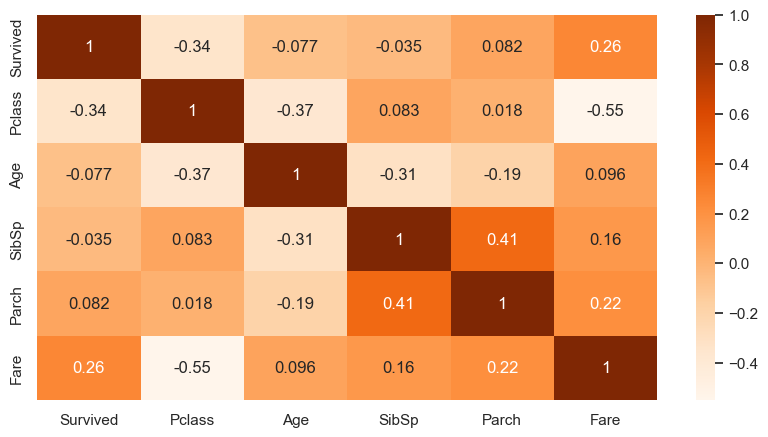

In [171]:
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_col_plot.corr(), annot=True, cmap='Oranges')

In [172]:
correlation = abs(pd.DataFrame(numeric_col_plot.corr().Survived))
correlation

,Survived
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


<Axes: >

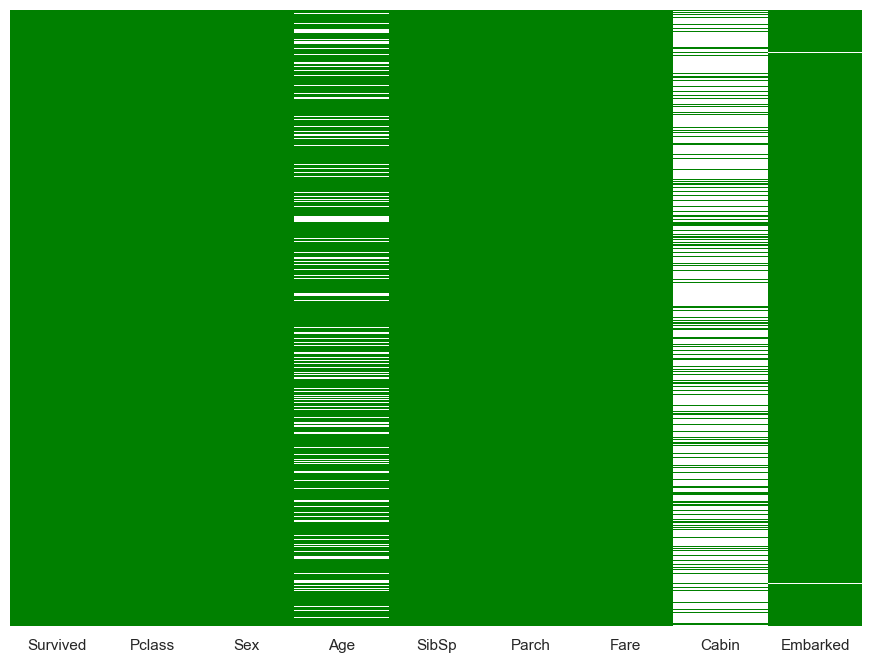

In [173]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="ocean")

In [174]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [175]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [176]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [177]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [178]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [179]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

/var/folders/sm/4czr9n5579j0vb8dh7wgt3r40000gn/T/ipykernel_1303/944857007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Survived",data=df, palette="Set3")


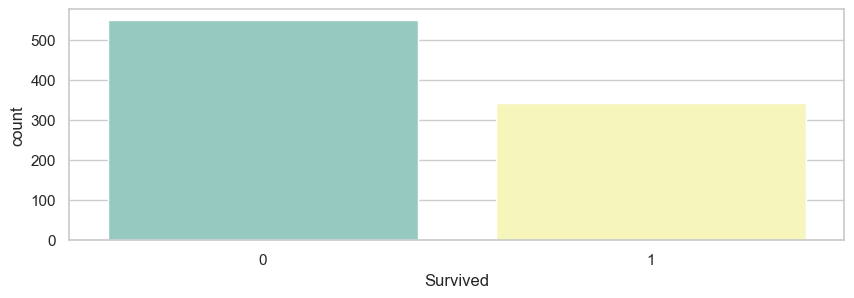

In [180]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=df, palette="Set3")
plt.show()

/var/folders/sm/4czr9n5579j0vb8dh7wgt3r40000gn/T/ipykernel_1303/503768782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survived', col='Sex', kind='count', data=df, palette="Set3")


<Figure size 1000x300 with 0 Axes>

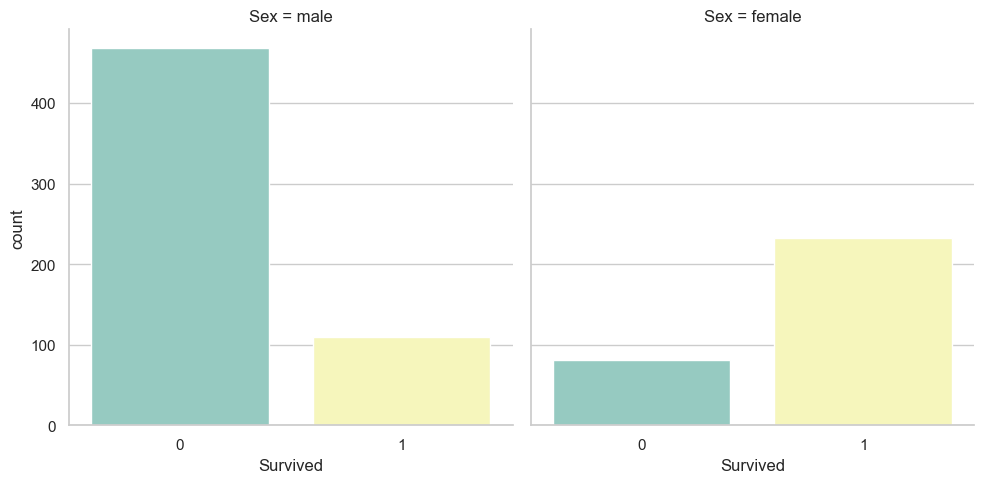

In [181]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=df, palette="Set3")
plt.show()

/var/folders/sm/4czr9n5579j0vb8dh7wgt3r40000gn/T/ipykernel_1303/4257224290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x ='Survived', col='Pclass', kind='count', data=df, palette="Set3")


<Figure size 1000x300 with 0 Axes>

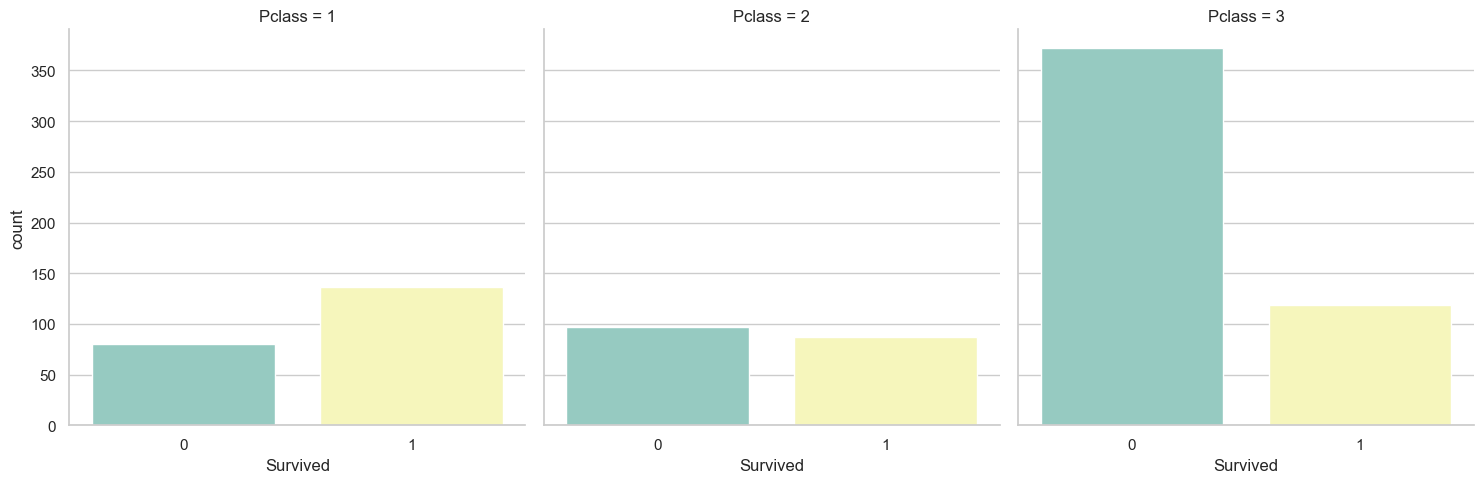

In [182]:
plt.figure(figsize=(10, 3))
sns.catplot(x ='Survived', col='Pclass', kind='count', data=df, palette="Set3")
plt.show()

People with the cheapest ticket class i.e Pclass 3 did not survive

<Figure size 1000x300 with 0 Axes>

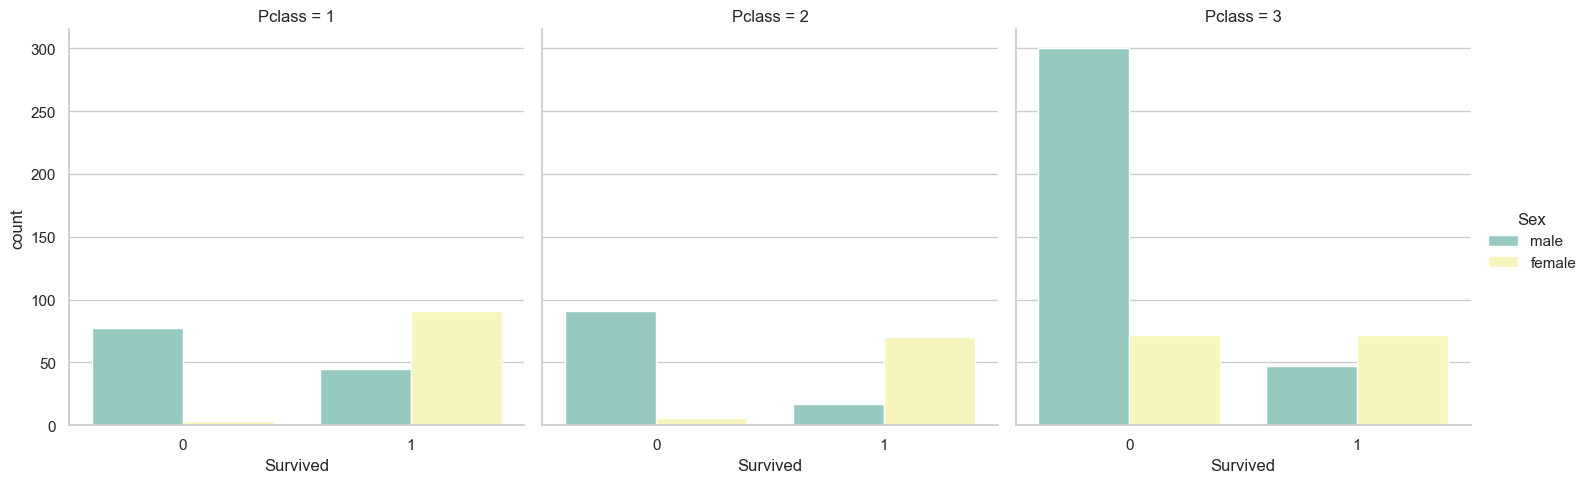

In [183]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Pclass', hue = 'Sex', kind='count', data=df, palette="Set3")
plt.show()

Pclass 3 has the majority of male who did not survive. And in each class, the non-survival of male is more than female 


/var/folders/sm/4czr9n5579j0vb8dh7wgt3r40000gn/T/ipykernel_1303/3533794477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survived', col='Embarked', kind='count', data=df, palette="Set3")


<Figure size 1000x300 with 0 Axes>

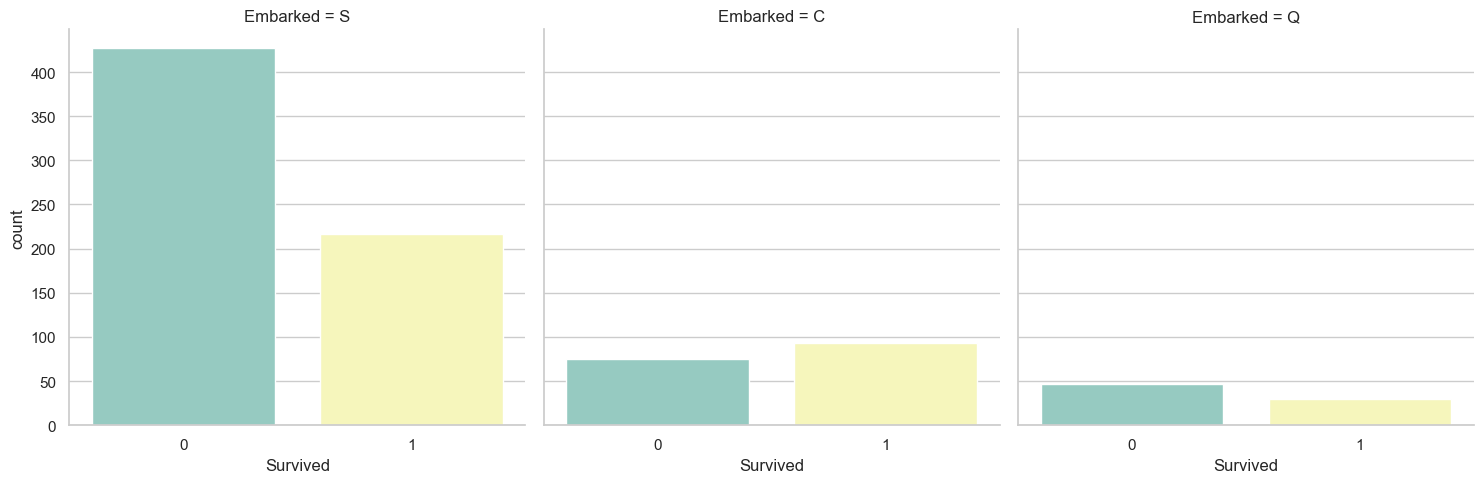

In [184]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', kind='count', data=df, palette="Set3")
plt.show()

People from Southampton port 'S' did not survive

<Figure size 1000x300 with 0 Axes>

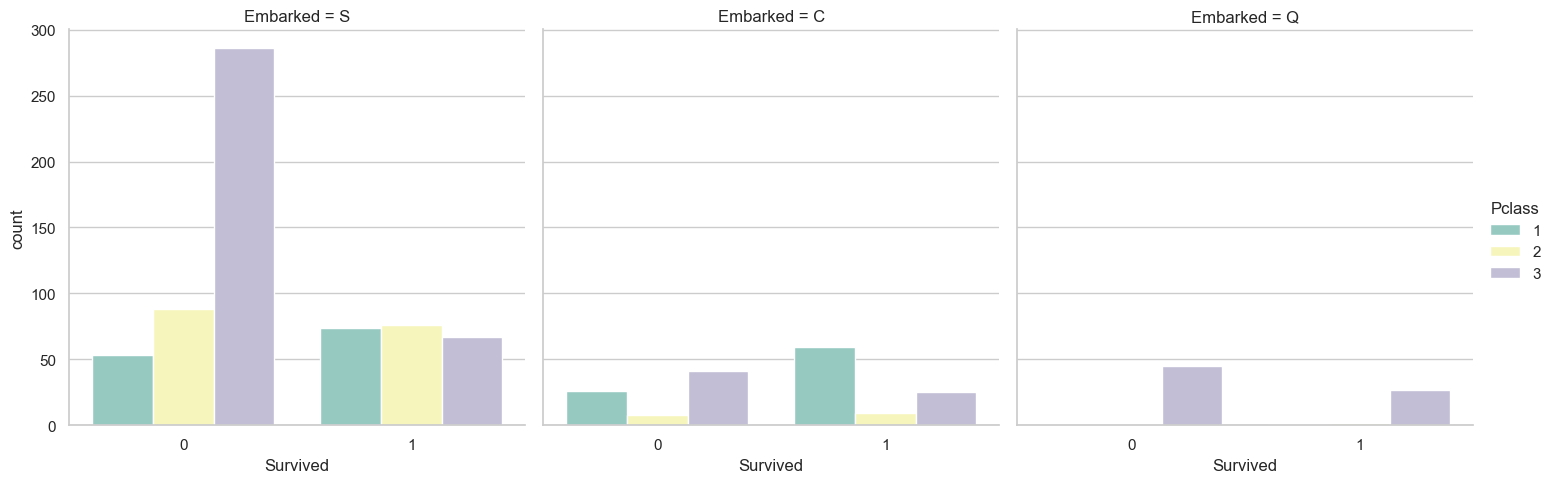

In [185]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=df, palette="Set3");
plt.show()

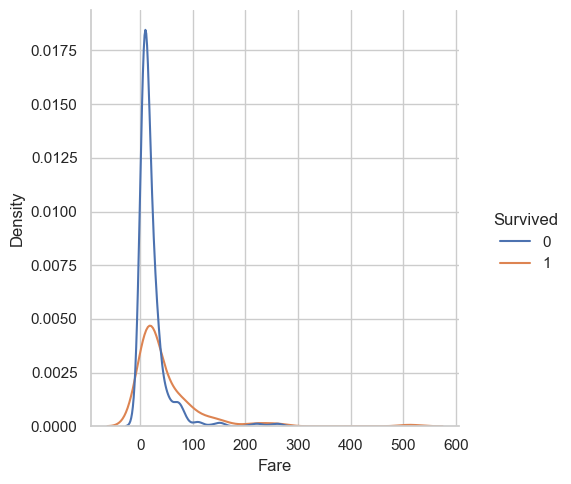

In [186]:
sns.displot(data=df, x="Fare",hue='Survived',kind ='kde')

People with ticket of low fare were the ones that did not survive 

In [187]:
df.drop(columns=['Cabin'], axis=1, inplace=True)

In [188]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [189]:
df["Embarked"] = df['Embarked'].fillna('S')

Text(0.5, 1.0, 'Age over Pclass')

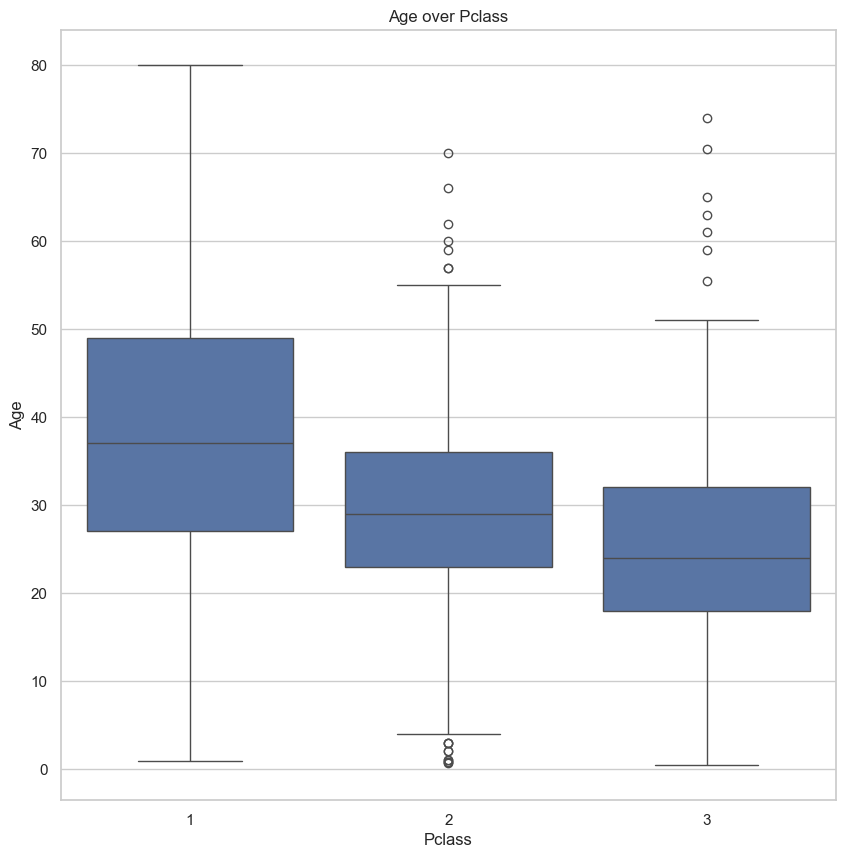

In [190]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=df)
plt.title('Age over Pclass')

From the box plot we can see that Pclass 1 median = 37, Pclass 2 median = 29 and Pclass 3 median = 24

In [191]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        if Pclass == 2:
            return 29
        
        if Pclass == 3:
            return 24
        
    return Age

In [192]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

In [193]:
df['Age'].isnull().sum()

np.int64(0)

In [194]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [195]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Encoding Categorical Features

In [196]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)

In [200]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [202]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [203]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [204]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [209]:
print("X train: ", X_train.shape)
print("X test: ", X_test.shape)

X train:  (712, 8)
X test:  (179, 8)


## Feature Scaling

In [210]:
cols = X_train.columns
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

In [211]:
LogisticRegression_model = LogisticRegression(max_iter=4000)
LogisticRegression_model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [212]:
y_pred = LogisticRegression_model.predict(X_test)

In [213]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[87, 16],
       [17, 59]])

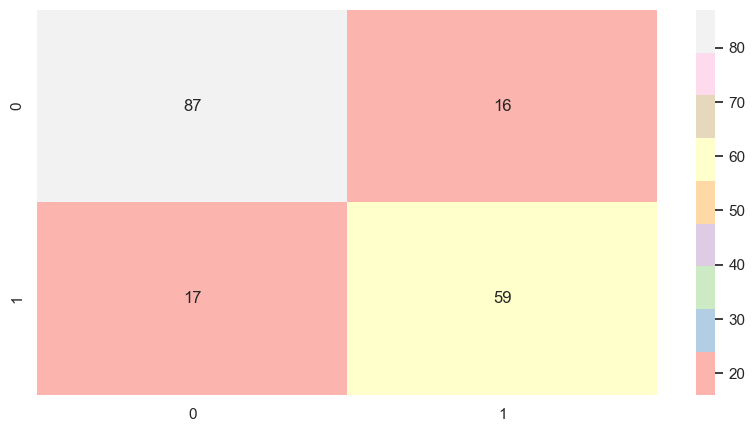

In [227]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Pastel1')
plt.show()

## Evaluation

In [228]:
print('Accuracy of Logistic Regression model is : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall of Logistic Regression model is : ', (metrics.recall_score(y_test, y_pred)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(y_test, y_pred)))

Accuracy of Logistic Regression model is :  0.8156424581005587
Recall of Logistic Regression model is :  0.7763157894736842
Precision of Logistic Regression model is :  0.7866666666666666


In [230]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       103
           1       0.79      0.78      0.78        76

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

